In [19]:
#Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Basic Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time

#Metrics (Computation)
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

#Boosting Algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

#Neural Network Model
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings("ignore")

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [33]:
heart=pd.read_csv('C:\\Users\\kwjin\\Desktop\\kwdoc\\대학원 수업\\2021-1학기\\데이터마이닝\\archive/heart.csv')
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [34]:
high_corr=["exng","cp","oldpeak","caa","slp","thall","output"]
data1 = heart[high_corr]
print(data1)

     exng  cp  oldpeak  caa  slp  thall  output
0       0   3      2.3    0    0      1       1
1       0   2      3.5    0    0      2       1
2       0   1      1.4    0    2      2       1
3       0   1      0.8    0    2      2       1
4       1   0      0.6    0    2      2       1
..    ...  ..      ...  ...  ...    ...     ...
298     1   0      0.2    0    1      3       0
299     0   3      1.2    0    1      3       0
300     0   0      3.4    2    1      3       0
301     1   0      1.2    1    1      3       0
302     0   1      0.0    1    1      2       0

[303 rows x 7 columns]


In [23]:
def compute(Y_pred,Y_test):
    #Output plot
    plt.figure(figsize=(12,2))
    plt.scatter(range(len(Y_pred)),Y_pred,color="yellow",lw=5,label="Predictions")
    plt.scatter(range(len(Y_test)),Y_test,color="red",label="Actual")
    plt.title("Prediction Values vs Real Values")
    plt.legend()
    plt.show()

    cm=confusion_matrix(Y_test,Y_pred)
    class_label = ["High-risk", "Low-risk"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm,annot=True,cmap='Pastel2',linewidths=2,fmt='d')
    plt.title("Confusion Matrix",fontsize=15)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    #Calculate Metrics
    acc=accuracy_score(Y_test,Y_pred)
    mse=mean_squared_error(Y_test,Y_pred)
    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label=1, average='binary')
    print('Precision: {} \nRecall: {} \nF1-Score: {} \nAccuracy: {} %\nMean Square Error: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round((acc*100),3), round((mse),3)))

In [24]:
df = pd.DataFrame(data1, columns=data1.columns)
sy = pd.Series(data1.output, dtype="category")
# sy = sy.cat.rename_categories(data.columns)
df['species'] = sy
df.tail()

,exng,cp,oldpeak,caa,slp,thall,output,species
298,1,0,0.2,0,1,3,0,0
299,0,3,1.2,0,1,3,0,0
300,0,0,3.4,2,1,3,0,0
301,1,0,1.2,1,1,3,0,0
302,0,1,0.0,1,1,2,0,0


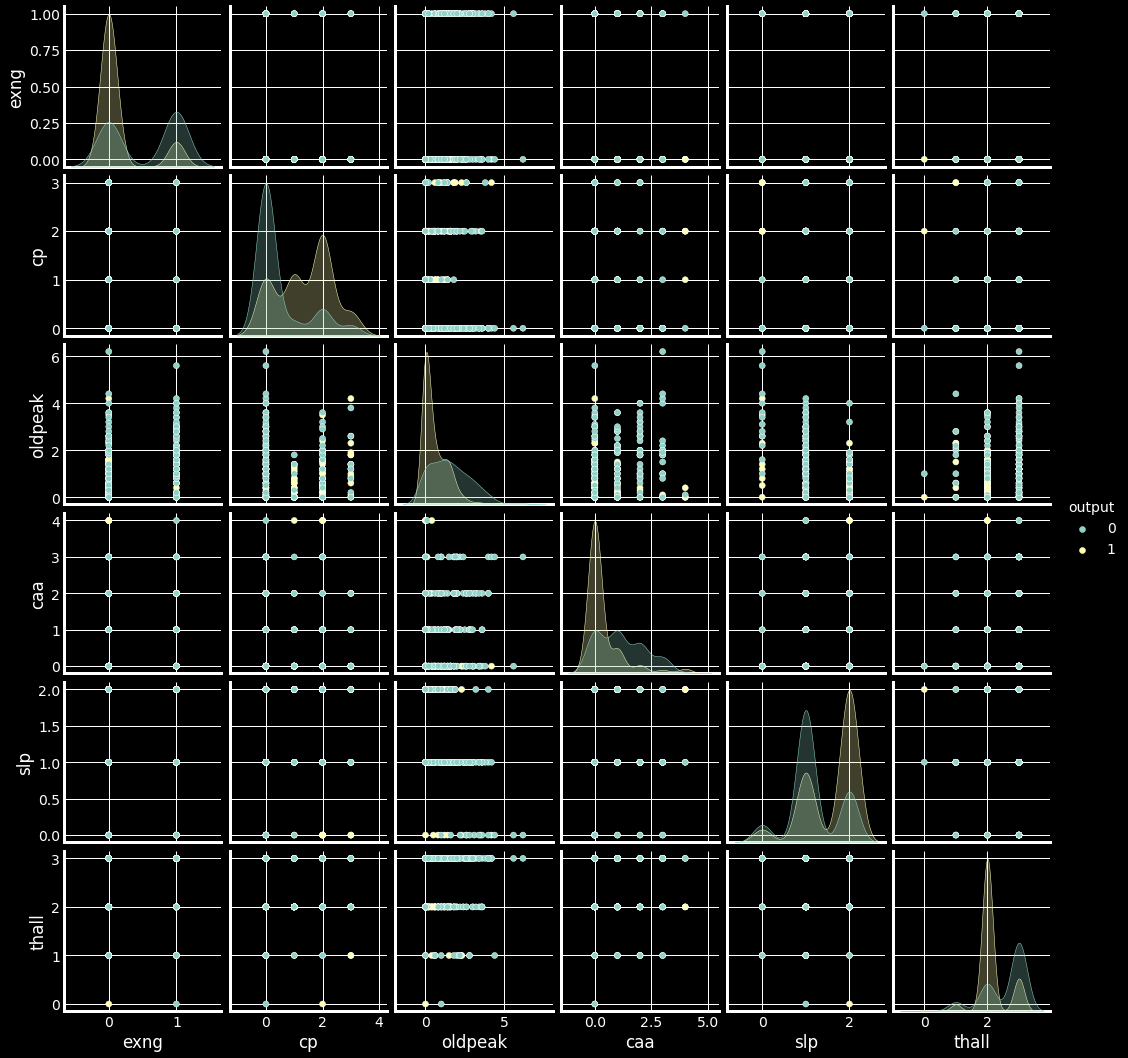

In [27]:
sns.pairplot(df, hue="output")
plt.show()

In [32]:
continuous_cols=["age","trtbps","chol","thalachh","oldpeak"]
continuous_data=data1[continuous_cols]

for k, v in continuous_data.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data1)[0]
        print("Column {} outliers = {} => {}%".format(k,len(v_col),round((perc),3)))

KeyError: "['chol', 'age', 'thalachh', 'trtbps'] not in index"

0
1
2
3


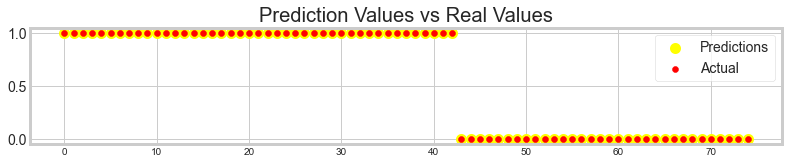

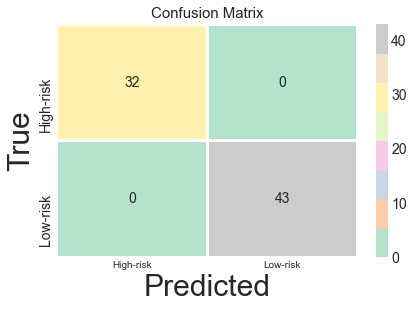

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
4
5
6
7


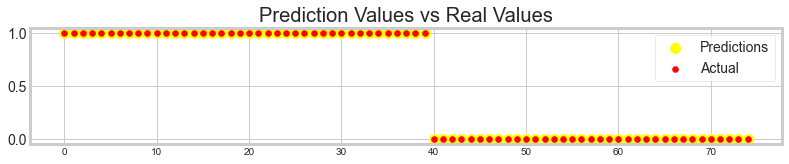

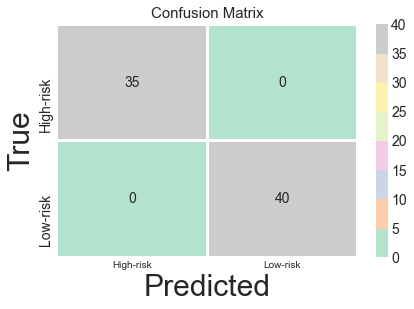

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
8
9
10
11


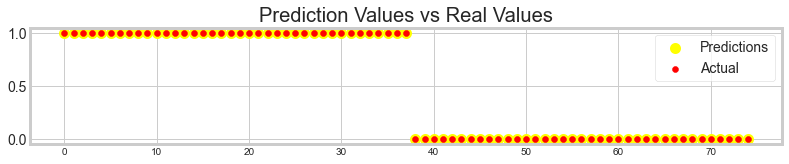

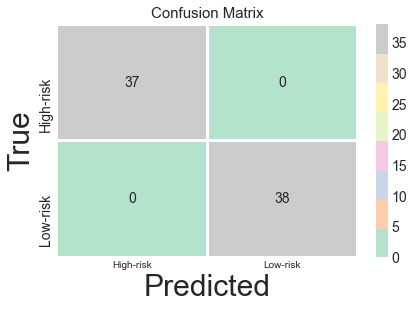

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
12
13
14
15


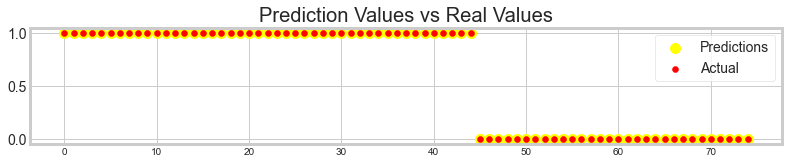

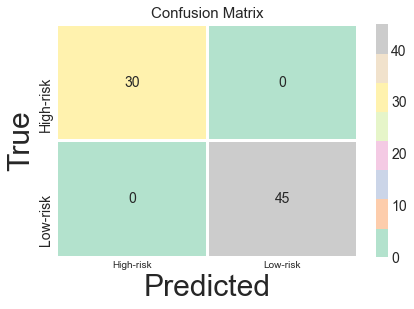

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
16
17
18
19


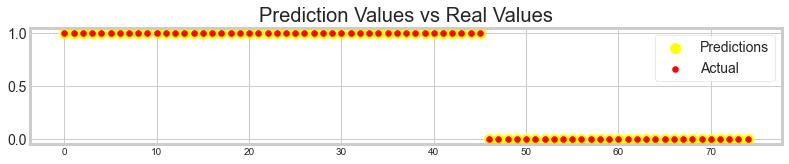

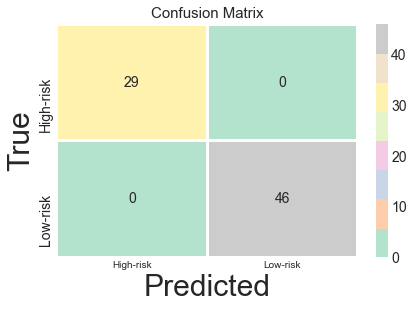

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
20
21
22
23


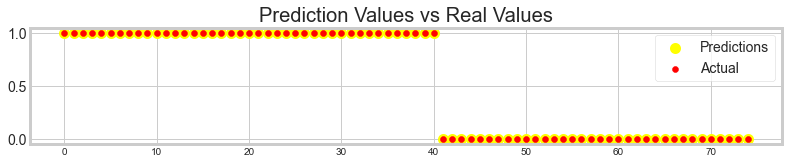

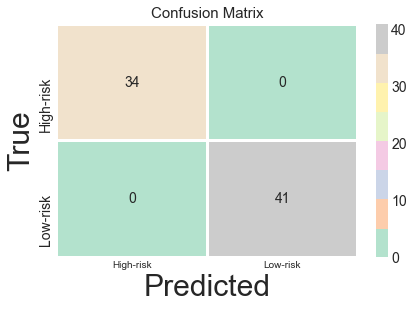

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
24
25
26
27


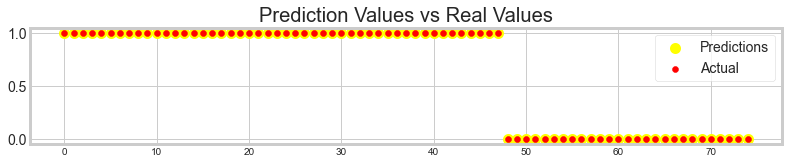

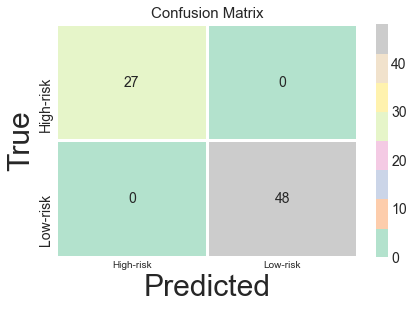

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
28
29
30
31


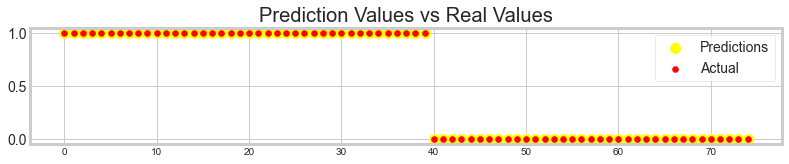

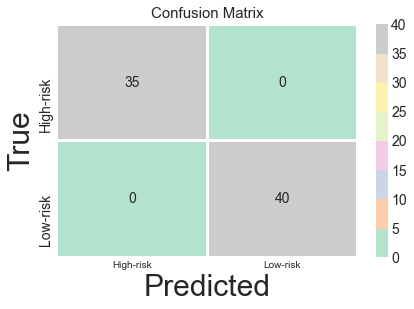

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
32
33
34
35


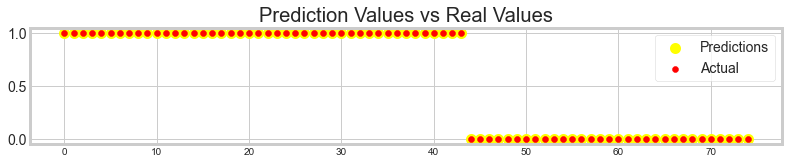

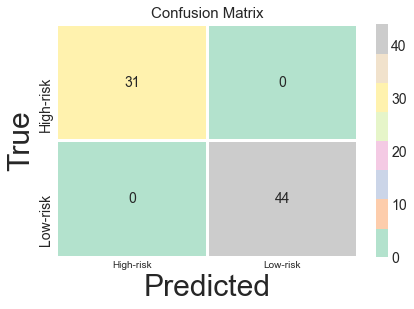

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
36
37
38
39


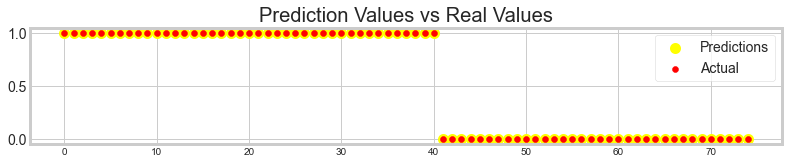

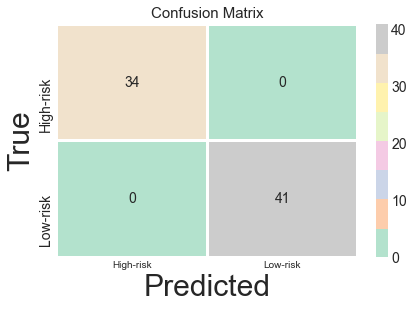

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
40
41
42
43


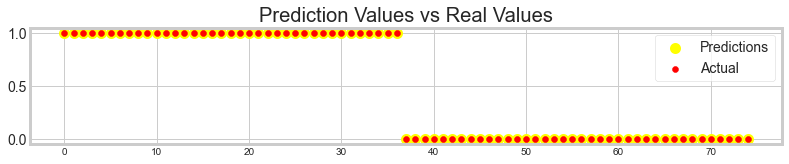

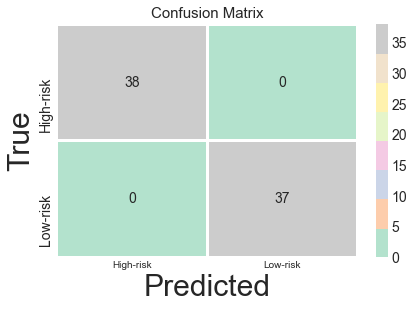

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0
44
45
46
47


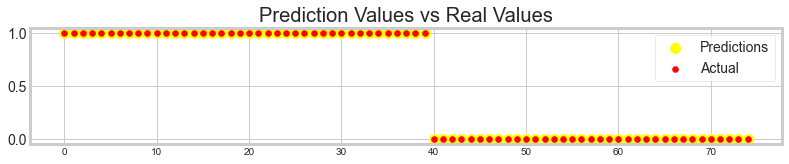

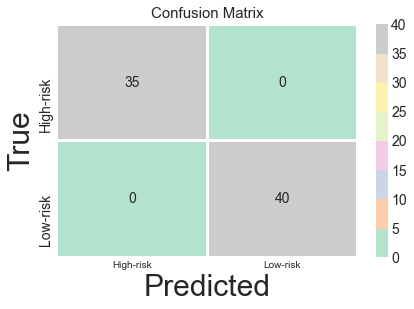

Precision: 1.0 
Recall: 1.0 
F1-Score: 1.0 
Accuracy: 100.0 %
Mean Square Error: 0.0


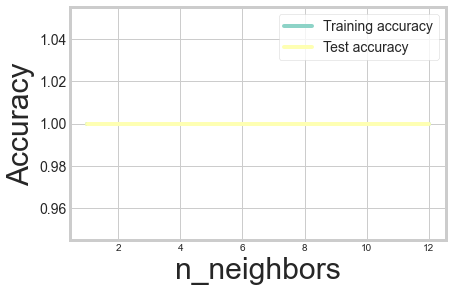

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
1.0
1.0


In [35]:
from sklearn.model_selection import KFold

training_points = data1.iloc[:,:13]
labels = data1["output"]
features = np.array(training_points)
label = np.array(labels)

kfold = KFold(n_splits=4, shuffle=True)


# X_train, X_test, y_train, y_test = train_test_split(
#    cancer.data, cancer.target, stratify=cancer.target, random_state=66)
training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,13)
i=0
T_train_accuracy=[]
T_test_accuracy=[]
total_tr=[]
total_te=[]

for n_neighbors in neighbors_settings:
    training_accuracy = []
    test_accuracy = []
#     y_train = MM_scaler.fit_transform(y_train)
#     y_test = MM_scaler.fit_transform(y_test)
    for train_index, test_index in kfold.split(features):
        clf = KNeighborsClassifier(n_neighbors=n_neighbors)

        # 모델 생성
        print(i)
        i+=1

        X_train, X_test = features[train_index], features[test_index]
        y_train, y_test = label[train_index], label[test_index]
        
        MM_scaler = MinMaxScaler()
        X_train = MM_scaler.fit_transform(X_train)
        X_test = MM_scaler.fit_transform(X_test)
        clf.fit(X_train, y_train)
        # 훈련 세트 정확도 저장
        training_accuracy.append(clf.score(X_train, y_train))
        # 일반화 정확도 저장
        test_accuracy.append(clf.score(X_test, y_test))

    T_train_accuracy.append(np.mean(training_accuracy))
    T_test_accuracy.append(np.mean(test_accuracy))
    total_tr.append(training_accuracy)
    total_te.append(test_accuracy)
    y_pred = clf.predict(X_test)
    compute(y_pred,y_test) 
plt.plot(neighbors_settings, T_train_accuracy, label="Training accuracy")
plt.plot(neighbors_settings, T_test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()
print(T_train_accuracy)
print(T_test_accuracy)


print(np.mean(T_train_accuracy))
print(np.mean(T_test_accuracy))

In [41]:
#Data Splitting
X=data1.iloc[:,:-1]
Y=data1["output"]

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.5,random_state=22) 

#MinMax Scaling / Normalization of data
MM_scaler = MinMaxScaler()
X_train = MM_scaler.fit_transform(X_train)
X_test = MM_scaler.fit_transform(X_test)

Execution time of model: 0.01101 seconds


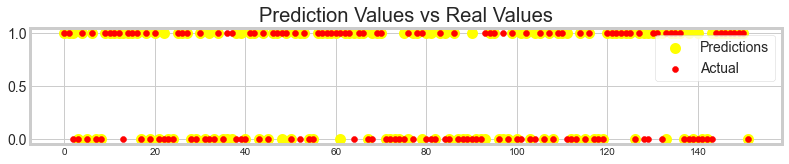

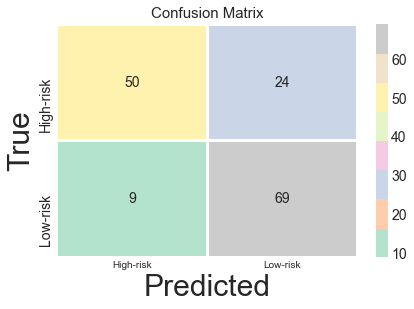

Precision: 0.742 
Recall: 0.885 
F1-Score: 0.807 
Accuracy: 78.289 %
Mean Square Error: 0.217


In [42]:
#Build Model
start=time.time()

model_KNN = KNeighborsClassifier(n_neighbors=15)
model_KNN.fit(X_train,y_train)
Y_pred = model_KNN.predict(X_test)

end=time.time()

model_KNN_time = end-start
model_KNN_accuracy=round(accuracy_score(y_test,Y_pred), 4)*100 # Accuracy

print(f"Execution time of model: {round((model_KNN_time),5)} seconds")
#Plot and compute metric
compute(Y_pred,y_test)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import sklearn.svm as svm
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=65) 
svm_clf = svm.SVC(kernel = 'rbf',random_state=100)
# parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],'kernel' : ["linear","rbf","poly"],'gamma': [0.001, 0.0001]}
parameters =[{'kernel': ['rbf','poly'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_test, y_test)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

# means = grid_svm.cv_results_['mean_test_score']
# stds = grid_svm.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, grid_svm.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r"
#           % (mean, std * 2, params))
# print("Detailed classification report:")
# print()
# print("The model is trained on the full development set.")
# print("The scores are computed on the full evaluation set.")
# print()
# y_true, y_pred = y_test, grid_svm.predict(X_test)
# print(classification_report(y_true, y_pred))

,C,gamma,kernel,mean_test_score
8,100,0.0010,rbf,0.845614
14,1000,0.0001,rbf,0.845614
10,100,0.0001,rbf,0.812281
4,10,0.0010,rbf,0.812281
16,1,NaN,linear,0.801170
19,1000,NaN,linear,0.800585
17,10,NaN,linear,0.789474
18,100,NaN,linear,0.789474
12,1000,0.0010,rbf,0.778947
6,10,0.0001,rbf,0.516374
